 # Gender classification using keras API

In [1]:
import numpy as np  # Data manipulation
import pandas as pd # Dataframe manipulation 
import matplotlib.pyplot as plt # Plotting the data and the results
import matplotlib.image as mpimg # For displaying imagees
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Exploratory Data Analysis

### Declaring Variables

In [2]:
size = 249
target_size = (size,size,3)

## Preperaing First Dataset

we will do some data augmentation to both datasets

In [3]:
train_datagen1 = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   zoom_range=0.3,
                                   rotation_range=20,
                                   rescale=1./255)

train_gen1 = train_datagen1.flow_from_directory('../input/gender-classification-dataset/Training',
                                              target_size=(size,size),
                                              batch_size=32,
                                              class_mode='binary')

Found 47009 images belonging to 2 classes.


In [4]:
test_datagen1 = ImageDataGenerator(rescale=1./255)

test_gen1 = test_datagen1.flow_from_directory('../input/gender-classification-dataset/Validation',
                                              target_size=(size,size),
                                              batch_size=32,
                                              class_mode='binary')

Found 11649 images belonging to 2 classes.


## Preperaing Second Dataset

In [5]:
train_datagen2 = ImageDataGenerator(rescale=1./255,
                                    rotation_range=30,
                                    shear_range=0.3,
                                    zoom_range=0.3,
                                    horizontal_flip=True,
                                    #width_shift_range=0.4,
                                    #height_shift_range=0.4,
                                   )

train_gen2 =train_datagen2.flow_from_directory('../input/gender-recognition-200k-images-celeba/Dataset/Train',
                                            target_size=(size,size),
                                            batch_size=64,
                                            class_mode='binary')



Found 160000 images belonging to 2 classes.


In [6]:
valid_datagen2 = ImageDataGenerator(rescale=1./255)

valid_gen2 = valid_datagen2.flow_from_directory('../input/gender-recognition-200k-images-celeba/Dataset/Validation',
                                                target_size=(size,size),
                                                batch_size=64,
                                                class_mode='binary')

Found 22598 images belonging to 2 classes.


### Observe the differences between two datasets

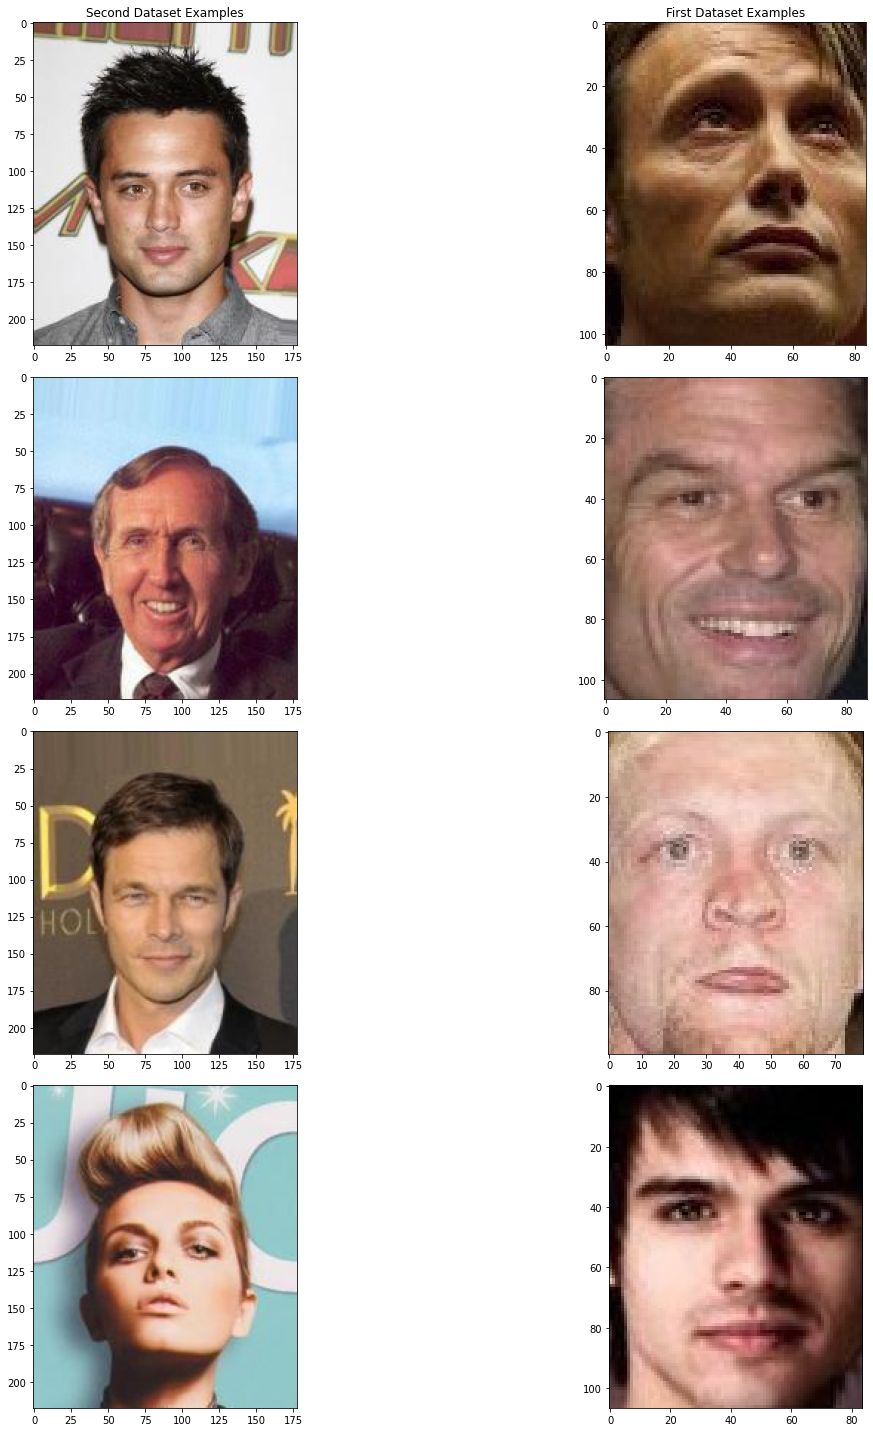

In [8]:
fig,ax=plt.subplots(ncols=2,nrows=4,figsize=(20,20))
img1 = mpimg.imread('../input/gender-recognition-200k-images-celeba/Dataset/Train/Male/000007.jpg')
ax[0][0].imshow(img1)
ax[0][0].set_title("Second Dataset Examples")
img2 = mpimg.imread('../input/gender-classification-dataset/Validation/male/063453.jpg.jpg')
ax[0][1].imshow(img2)
ax[0][1].set_title("First Dataset Examples")
img3 =  mpimg.imread('../input/gender-recognition-200k-images-celeba/Dataset/Train/Male/000021.jpg')
ax[1][0].imshow(img3)
img4= mpimg.imread('../input/gender-classification-dataset/Validation/male/063495.jpg.jpg')
ax[1][1].imshow(img4)
img5 = mpimg.imread('../input/gender-recognition-200k-images-celeba/Dataset/Train/Male/000033.jpg')
ax[2][0].imshow(img5)
img6 = mpimg.imread('../input/gender-classification-dataset/Validation/male/063517.jpg.jpg')
ax[2][1].imshow(img6)
ax[3][0].imshow(mpimg.imread('../input/gender-recognition-200k-images-celeba/Dataset/Train/Female/000005.jpg'))
ax[3][1].imshow(mpimg.imread('../input/gender-classification-dataset/Validation/male/063531.jpg.jpg'))
plt.tight_layout()

# Model Building

In [17]:
#base
model = Sequential()
model.add(Xception(include_top=False, pooling='avg', weights='imagenet', input_shape=target_size))
model.add(Flatten())
model.add(BatchNormalization())
#head
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

model.layers[0].trainable = False

In [18]:
model.summary()
model.compile(optimizer= 'Adam', loss = 'binary_crossentropy', metrics= 'accuracy')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 2048)              20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 2048)              8192      
_________________________________________________________________
dense_3 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
batch_normalization_12 (Batc (None, 2048)              8192      
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_13 (Batc (None, 1024)             

# Training The Model on First Dataset

In [19]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
                                             save_best_only = True,
                                             monitor= 'val_accuracy',
                                             mode = 'max')

In [28]:
epochs = 12
batch_size=256
history1 = model.fit(train_gen1, epochs= epochs, validation_data= test_gen1,
                    steps_per_epoch= len(train_gen1.filenames)//batch_size,
                    validation_steps= len(test_gen1.filenames)//batch_size,
                    callbacks= [checkpoint]
                    )

Epoch 1/12
183/183 [==============================] - 105s 573ms/step - loss: 0.4269 - accuracy: 0.8179 - val_loss: 0.2912 - val_accuracy: 0.8792


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/12
183/183 [==============================] - 101s 553ms/step - loss: 0.4063 - accuracy: 0.8249 - val_loss: 0.3477 - val_accuracy: 0.8528
Epoch 3/12
183/183 [==============================] - 102s 557ms/step - loss: 0.3624 - accuracy: 0.8369 - val_loss: 0.2667 - val_accuracy: 0.8840
Epoch 4/12
183/183 [==============================] - 100s 547ms/step - loss: 0.3711 - accuracy: 0.8378 - val_loss: 0.2129 - val_accuracy: 0.9194
Epoch 5/12
183/183 [==============================] - 98s 536ms/step - loss: 0.3557 - accuracy: 0.8487 - val_loss: 0.2465 - val_accuracy: 0.8986
Epoch 6/12
183/183 [==============================] - 96s 523ms/step - loss: 0.3686 - accuracy: 0.8371 - val_loss: 0.2682 - val_accuracy: 0.8910
Epoch 7/12
183/183 [==============================] - 94s 512ms/step - loss: 0.3449 - accuracy: 0.8478 - val_loss: 0.2057 - val_accuracy: 0.9153
Epoch 8/12
183/183 [==============================] - 95s 518ms/step - loss: 0.3347 - accuracy: 0.8542 - val_loss: 0.1979 - val

### Let's plot the Training vs Validation loss and accuracy graphs.

<Figure size 432x288 with 0 Axes>

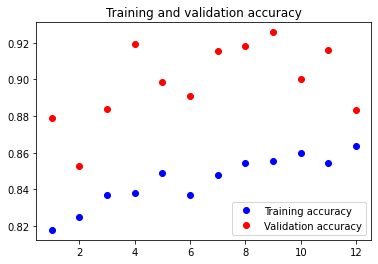

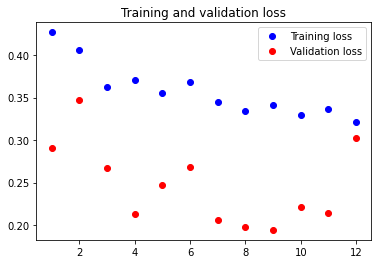

<Figure size 432x288 with 0 Axes>

In [29]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

## Model Testing (1)

### Testing First Dataset

In [30]:
test_loss, test_acc = model.evaluate(test_gen1, steps=50)
print('test acc:', test_acc)
print('test_loss:',test_loss)

50/50 [==============================] - 5s 100ms/step - loss: 0.3161 - accuracy: 0.8744
test acc: 0.8743749856948853
test_loss: 0.3161347508430481


### Testing Second Dataset

In [31]:
test_datagen2 = ImageDataGenerator(rescale=1./255)

test_gen2 = test_datagen2.flow_from_directory('../input/gender-recognition-200k-images-celeba/Dataset/Test',
                                              target_size=(size,size),
                                              batch_size=650,
                                              class_mode='binary')

Found 20001 images belonging to 2 classes.


In [34]:
test_loss, test_acc = model.evaluate(test_gen2, steps=50)
print('test acc:', test_acc)
print('test_loss:',test_loss)

50/50 [==============================] - 68s 1s/step - loss: 0.2860 - accuracy: 0.8921
test acc: 0.8921054005622864
test_loss: 0.28599411249160767


# Training The Model on Second Dataset

In [35]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('xception_v2_{epoch:02d}_{val_accuracy:.3f}.h5',
                                             save_best_only = True,
                                             monitor= 'val_accuracy',
                                             mode = 'max')

In [41]:
epochs = 5 #should train for 10 epochs
batch_size=512
history2 = model.fit(train_gen2, epochs = epochs, validation_data = valid_gen2,
                    steps_per_epoch= len(train_gen2.filenames)//batch_size,
                    validation_steps= len(valid_gen2.filenames)//batch_size,
                    callbacks= [checkpoint]
                    )

Epoch 1/5
312/312 [==============================] - 364s 1s/step - loss: 0.1790 - accuracy: 0.9276 - val_loss: 0.1529 - val_accuracy: 0.9329
Epoch 2/5
312/312 [==============================] - 359s 1s/step - loss: 0.1774 - accuracy: 0.9264 - val_loss: 0.1675 - val_accuracy: 0.9322
Epoch 3/5
312/312 [==============================] - 355s 1s/step - loss: 0.1828 - accuracy: 0.9255 - val_loss: 0.1705 - val_accuracy: 0.9322
Epoch 4/5
312/312 [==============================] - 346s 1s/step - loss: 0.1748 - accuracy: 0.9299 - val_loss: 0.1577 - val_accuracy: 0.9354
Epoch 5/5
312/312 [==============================] - 340s 1s/step - loss: 0.1781 - accuracy: 0.9254 - val_loss: 0.1468 - val_accuracy: 0.9450


## Model Testing (2)

### Testing First Dataset

In [50]:
test_loss, test_acc = model.evaluate(test_gen1, steps=50)
print('test acc:', test_acc)
print('test_loss:',test_loss)

50/50 [==============================] - 8s 159ms/step - loss: 0.2502 - accuracy: 0.9112
test acc: 0.9112499952316284
test_loss: 0.2502405643463135


### Testing Second Dataset

In [51]:
test_loss, test_acc = model.evaluate(test_gen2, steps=100)
print('test acc:', test_acc)
print('test_loss:',test_loss)

100/100 [==============================] - 68s 654ms/step - loss: 0.1308 - accuracy: 0.9471
test acc: 0.9470526576042175
test_loss: 0.1307835876941681


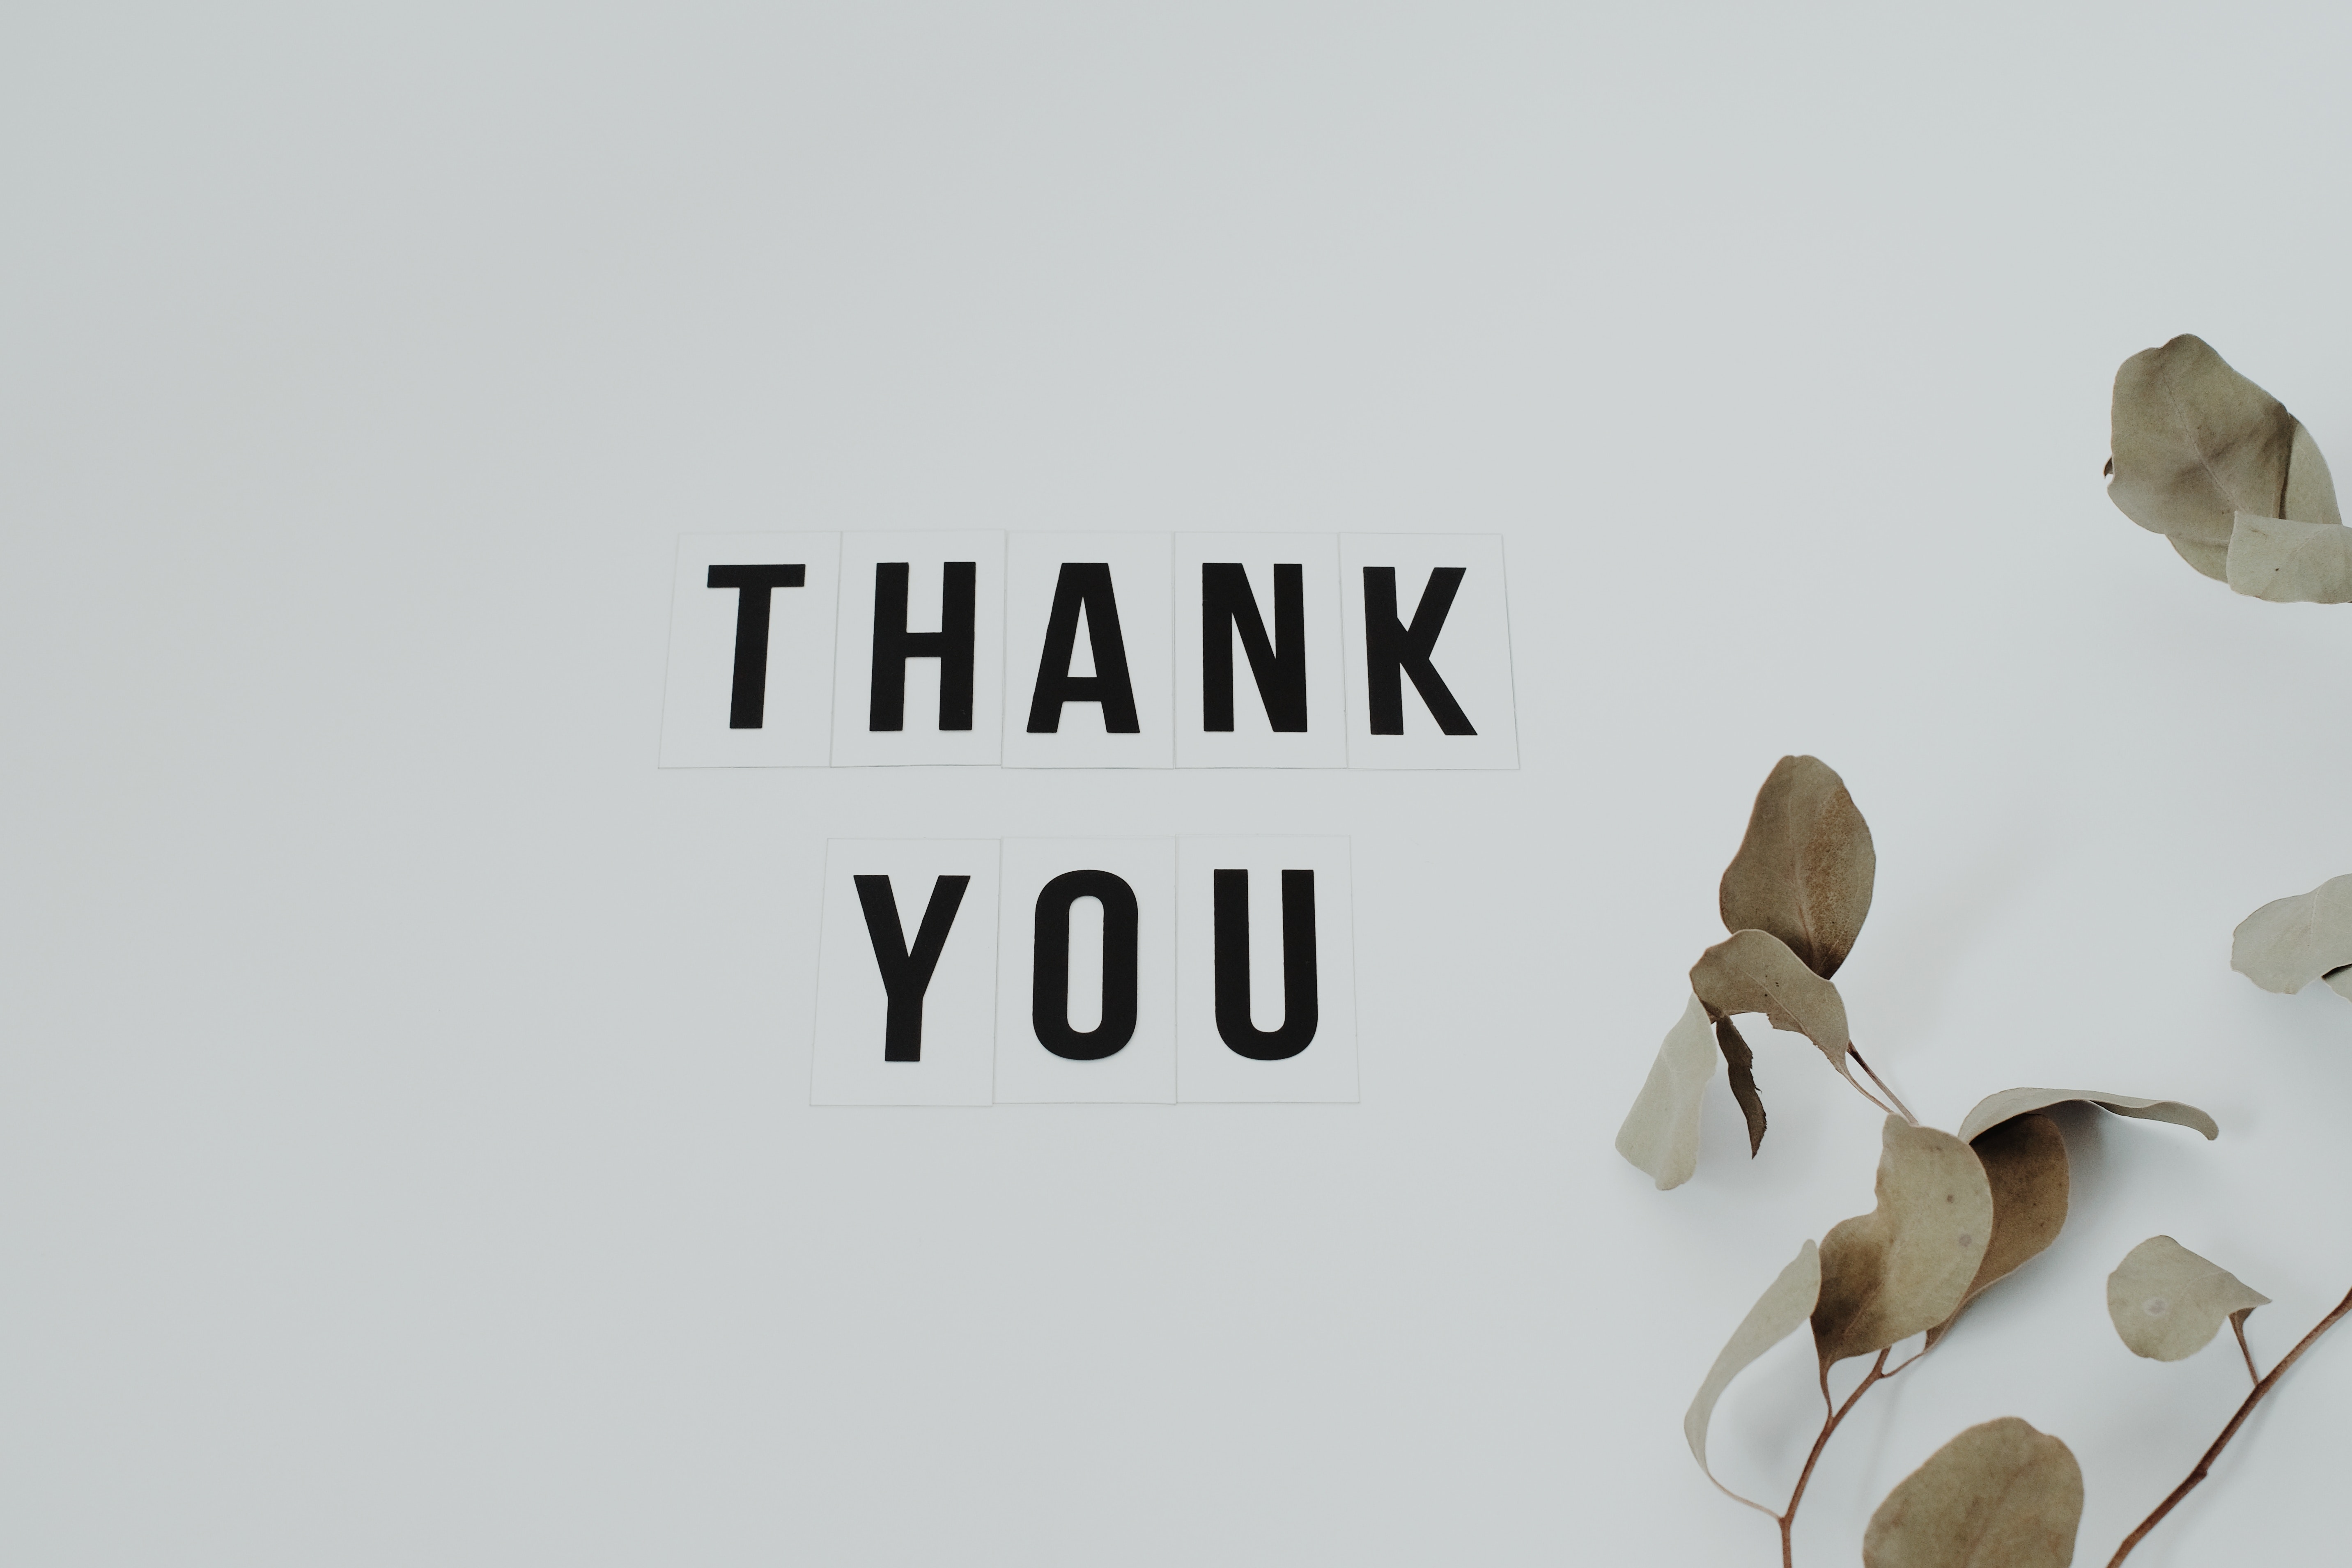